In [1]:
import cv2 as cv

In [2]:
# 读取图片
img = cv.imread('data/demo.jpg')
# 读取图片形状
img_shape = img.shape
print('height',img_shape[0],'width', img_shape[1], 'channels', img_shape[2])

height 512 width 512 channels 3


三个参数分别为 分辨率(height * width)(512*512)以及通道数(3)

In [3]:
img.dtype

dtype('uint8')

### 灰度化公式
浮点计算：$Gray=R*0.3+G*0.59+B*0.11$

In [4]:
import numpy as np
new_img = np.zeros(img_shape[:-1], img.dtype)
img, new_img

(array([[[122, 137, 229],
         [122, 137, 229],
         [122, 137, 229],
         ...,
         [109, 138, 229],
         [ 94, 124, 219],
         [ 67,  99, 194]],
 
        [[122, 137, 229],
         [122, 137, 229],
         [122, 137, 229],
         ...,
         [120, 145, 237],
         [110, 136, 230],
         [ 83, 111, 205]],
 
        [[122, 137, 229],
         [122, 137, 229],
         [121, 136, 228],
         ...,
         [119, 139, 227],
         [107, 128, 219],
         [ 79, 100, 191]],
 
        ...,
 
        [[ 48,  24,  82],
         [ 50,  26,  84],
         [ 56,  27,  90],
         ...,
         [ 87,  71, 172],
         [ 86,  72, 173],
         [ 85,  71, 172]],
 
        [[ 45,  21,  79],
         [ 47,  23,  81],
         [ 54,  25,  88],
         ...,
         [ 85,  71, 172],
         [ 90,  76, 178],
         [ 91,  78, 180]],
 
        [[ 43,  19,  77],
         [ 46,  22,  80],
         [ 53,  24,  87],
         ...,
         [ 85,  71, 172],
  

In [5]:
for i in range(img_shape[0]):
    for j in range(img_shape[1]):
        coordinate = img[i,j]
        # CV 读取的三通道 分别为BGR 并不是RGB
        B = coordinate[0]
        G = coordinate[1]
        R = coordinate[2]
        new_img[i,j] =R * 0.3 + G * 0.59 + B * 0.11    
new_img

array([[162, 162, 162, ..., 162, 149, 123],
       [162, 162, 162, ..., 169, 161, 136],
       [162, 162, 161, ..., 163, 152, 124],
       ...,
       [ 44,  46,  49, ..., 103, 103, 102],
       [ 41,  43,  47, ..., 102, 108, 110],
       [ 39,  42,  46, ..., 102, 110, 115]], dtype=uint8)

Text(0.5, 1.0, '灰度化')

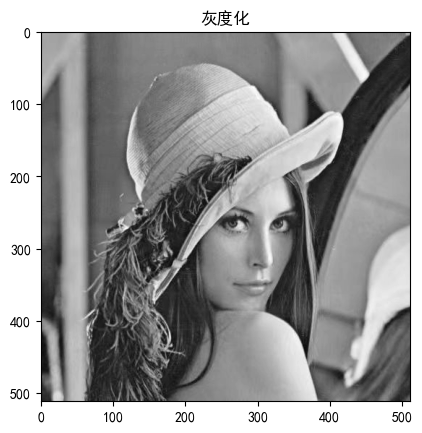

In [6]:
# 在notebook中 不使用弹窗口显示
# cv.imshow('Gray', new_img)
# cv.waitKey(0) # 需增加该行不然卡死
# cv.destroyAllWindows()
%matplotlib inline 
import matplotlib.pyplot as plt
# 临时更改字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.imshow(new_img, cmap='gray')
plt.title('灰度化')
#plt.axis('off') 关闭坐标轴

### 灰度化优化版 直接向量点积

In [7]:
# 三通道视为1*3的矩阵(向量) 直接 点积 相同形状的矩阵(向量) 得出结果
# 将三通道的值设置为BGR要乘上的值 (0.11,0.59,0.3)
# BGR 
# 相同的逻辑 img[:,:]*np.array([0.11,0.59,0.3])).sum()
test = (img[:,:].dot(np.array([0.11,0.59,0.3]))).astype(np.uint8)
bool_result = (test == new_img)
print(bool_result)
# 验证是可行的,但有精度问题

# 找出 所有False 的 坐标
a = np.argwhere(bool_result==0)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [8]:
test[a[0,0],a[0,1]],new_img[a[0,0],a[0,1]]

(121, 122)

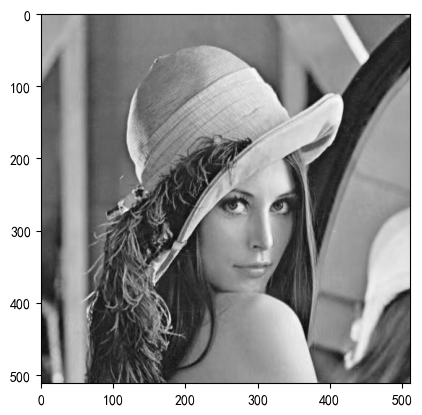

In [9]:
plt.imshow(test, cmap='gray')

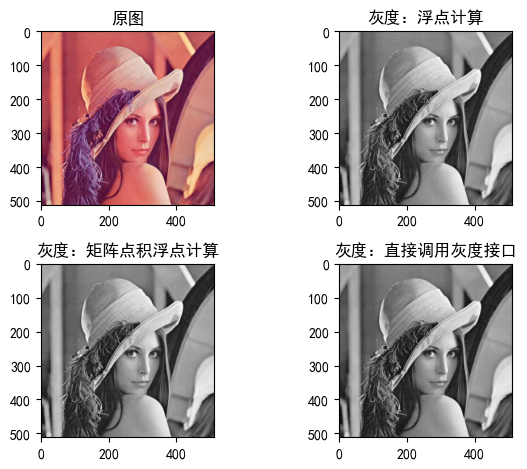

In [10]:
from skimage.color import rgb2gray
# 原图 matplotlib 的展示图片是RGB模式，所以要转成RGB模式
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(221)
plt.imshow(img_rgb) 
plt.title('原图')
plt.subplot(222)
plt.imshow(new_img, cmap='gray')
plt.title('灰度：浮点计算')
plt.subplot(223)
plt.imshow(test, cmap='gray')
plt.title('灰度：矩阵点积浮点计算')
plt.subplot(224)
img_plt_gray = rgb2gray(img_rgb)
plt.imshow(img_plt_gray, cmap='gray')
plt.title('灰度：直接调用灰度接口')
plt.tight_layout() # 调整图像的间距
plt.show()

## 二值化

In [11]:
img_plt_gray

array([[0.60968039, 0.60968039, 0.60968039, ..., 0.6088102 , 0.55695882,
        0.45835412],
       [0.60968039, 0.60968039, 0.60968039, ..., 0.63822549, 0.60431529,
        0.50571059],
       [0.60968039, 0.60968039, 0.60575882, ..., 0.61277647, 0.57185647,
        0.46205255],
       ...,
       [0.14923686, 0.15708   , 0.16658196, ..., 0.36712196, 0.37047804,
        0.36655647],
       [0.13747216, 0.14531529, 0.15873882, ..., 0.36655647, 0.38699765,
        0.39455804],
       [0.12962902, 0.14139373, 0.15481725, ..., 0.36655647, 0.39341922,
        0.41302706]])

In [12]:
# 灰度图像 二值化，小于0.5赋值0，否则1
img_two = np.where(img_plt_gray<0.5,0,1)
img_two

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, '二值化')

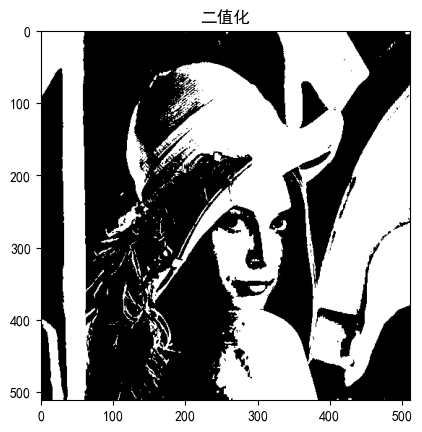

In [13]:
plt.imshow(img_two, cmap='gray')
plt.title('二值化')

### 最临近插值

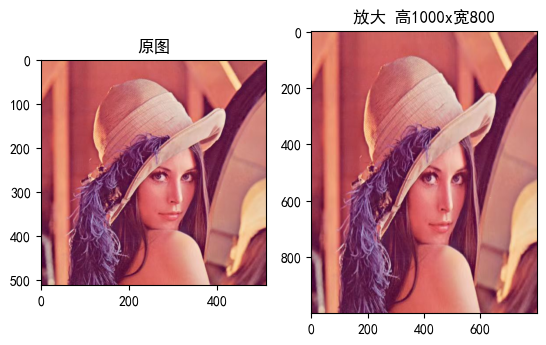

In [14]:
# 新图片的分辨率 1000*800
new_width = 800
new_height = 1000
# 放大图像
big_img = np.zeros([new_height,new_width,img_shape[2]], dtype=img.dtype)
height_rate = img_shape[1]/new_height
width_rate = img_shape[0]/new_width
for i in range(new_height):
    for j in range(new_width):
        # 减1以免超出索引
        actual_i = int(height_rate * i + 0.5)-1
        actual_j = int(width_rate * j + 0.5)-1
        big_img[i,j] = img_rgb[actual_i, actual_j]
plt.subplot(121)        
plt.imshow(img_rgb)
plt.title('原图')
plt.subplot(122)
plt.imshow(big_img)
plt.title('放大 高%dx宽%d' % (new_height,new_width))
plt.tight_layout
plt.show()
